# Projet 10 : Détectez des faux billets avec R ou Python

## Importation des librairies

In [1]:
# importation des librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.cluster import KMeans 
from sklearn import cluster, metrics 
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import contingency_matrix
from sklearn.linear_model import LogisticRegression

import scipy as st
from scipy.cluster.hierarchy import ward, fcluster
from scipy.stats import t, shapiro
from scipy import stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api

## Importation du fichier de 1500 billets

In [2]:
# importation des données
billet= pd.read_csv("billets.csv", sep=";")
billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


## Analyse exploratoire du jeu de données

In [3]:
# vérification des nulls et du type colonne
billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


On retrouve 37 valeurs manquantes dans le fichier, elles concernant la variable margin_low, nous allons par la suite regarder quoi faire avec

### Analyse des valeurs manquantes

In [4]:
# affichage des données avec valeurs manquantes
df_nan=billet[billet["margin_low"].isna()]
df_nan

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


On visualise les 37 lignes avec les valeurs manquantes, 29 vrais billets et 8 faux

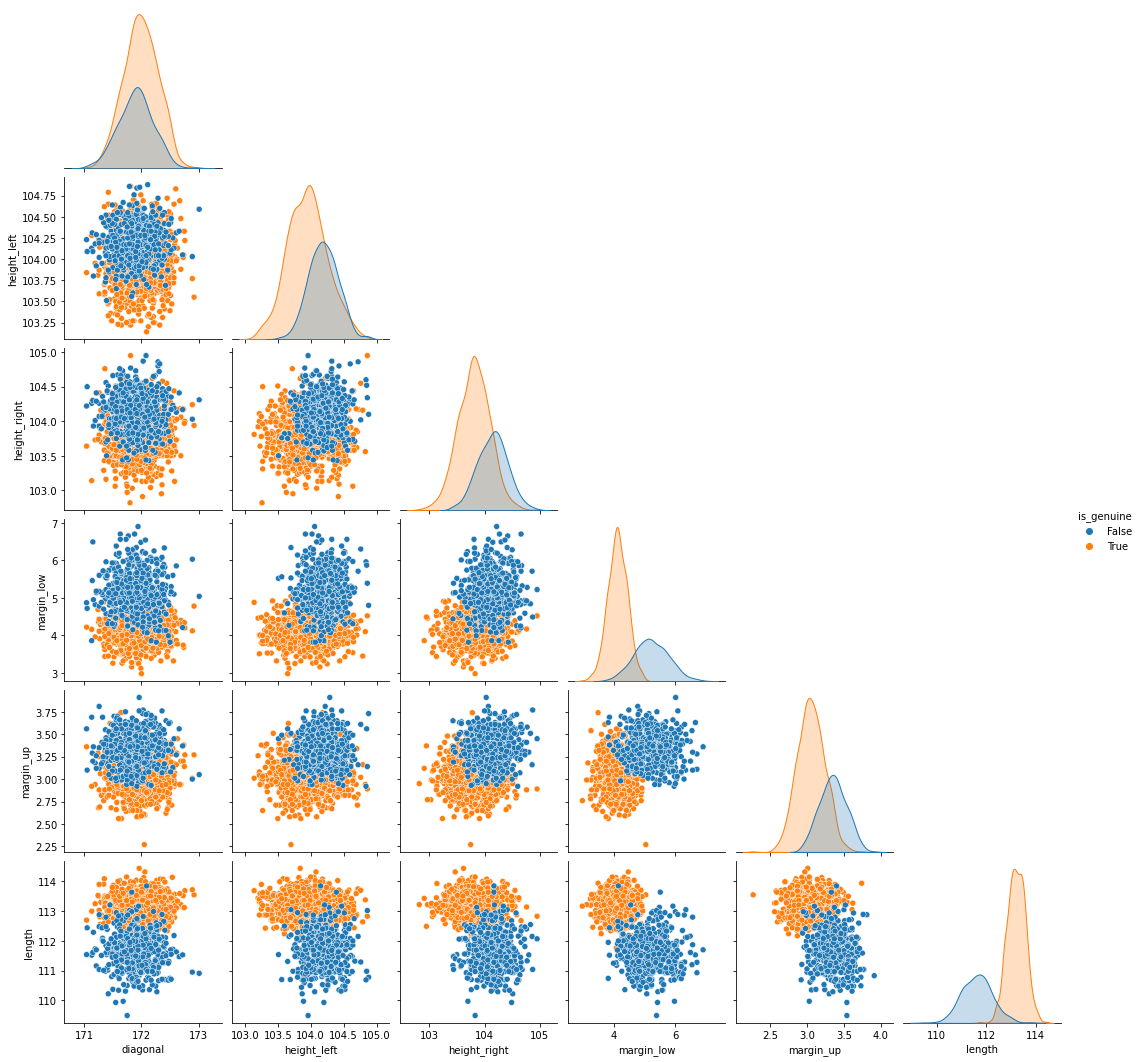

In [5]:
# visualisation du rapport entre les faux et vrai selon les variables
pair = sns.pairplot(billet, hue="is_genuine",corner=True)
pair = plt.show()

On voit clairement la différence entre les deux sortes de billets entre chaque variables, on peut voir des corrélations surtout entre length et margin low

In [6]:
# création df sans valeurs manquantes
df_sans_nan=billet.dropna()
df_sans_nan

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


37 lignes ont bien disparu

In [7]:
# affichage des corrélations entre les variables
df_sans_nan.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.134720,-0.373624,-0.487177,-0.783032,-0.610412,0.850223
diagonal,0.134720,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,-0.373624,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.487177,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.610412,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.850223,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


La variable length est la plus corrélé avec margin low comme vu précedemment

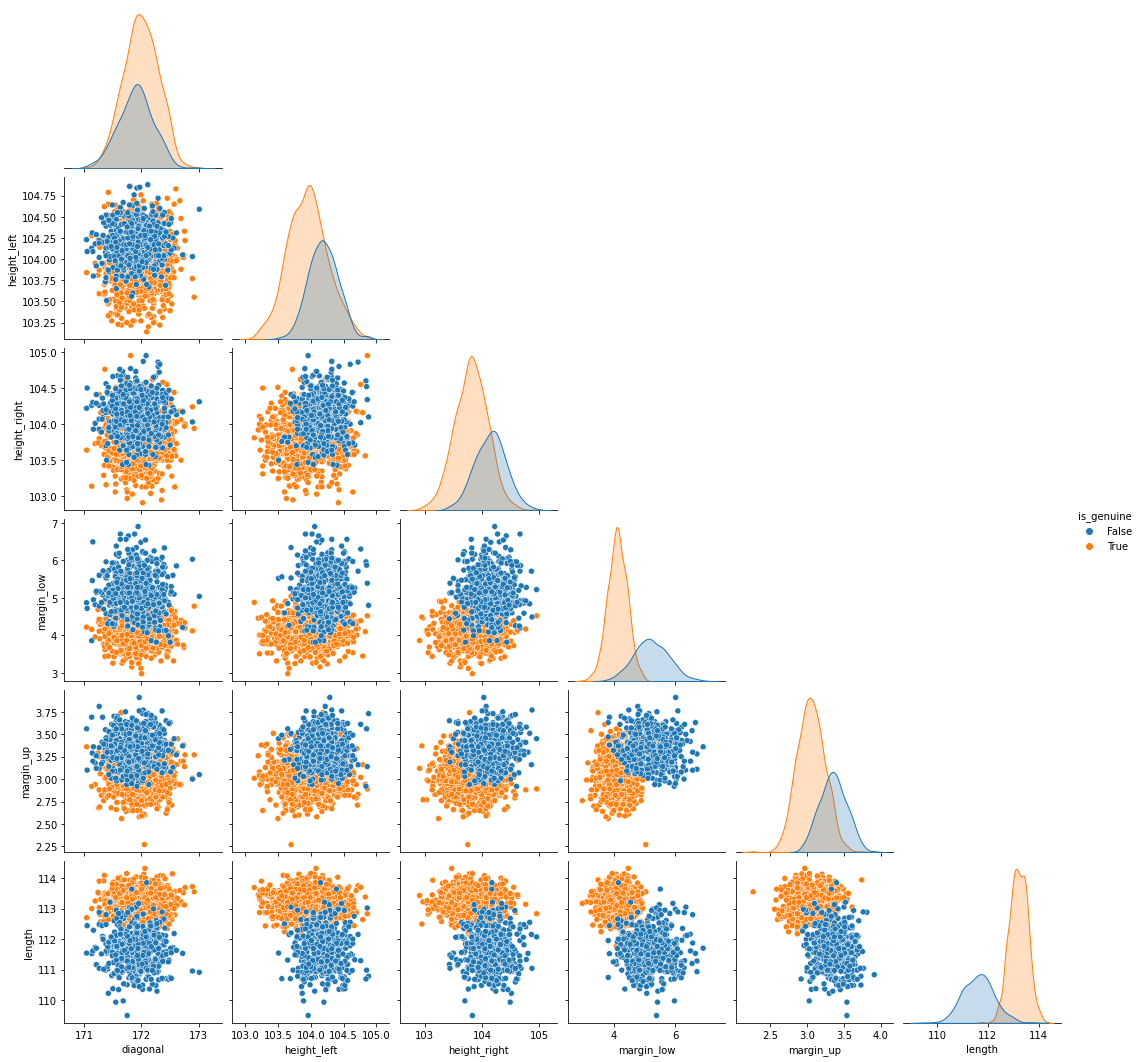

In [8]:
# visualisation du rapport entre les faux et vrai selon les variables
pair2 = sns.pairplot(df_sans_nan,hue="is_genuine", corner=True)
pair2 = plt.show()

On peut voir le peu de changement sans les lignes avec des valeurs manquantes

## Regression linéaire

In [9]:
# Creation de X_train et Y_train:
x_train = df_sans_nan.drop("margin_low", axis=1)
y_train = df_sans_nan["margin_low"]

# Regression lineaire:
reg_lin = LinearRegression()
model_reg_lin = reg_lin.fit(x_train, y_train)

In [10]:
reg = smf.ols("margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length", data=df_sans_nan).fit()
reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Fri, 27 May 2022   Prob (F-statistic):          4.75e-299
Time:                        10:06:35   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8.316      0.345      0.730     -13.445      19.179
is_genuine[T.True]    -1.1406      0.050    -23.028      0.000      -1.238      -1.043
diagonal              -0.0130      0.036     -0.364      0.716      -0.083       0.057
height_left            0.0283      0.039      0.727      0.468      -0.048       0.105
height_right           0.0267      0.038      0.701      0.484      -0.048       0.102
margin_up             -0.2128      0.059     -3.621      0.000      -0.328      -0.098
length                -0.0039      0.023     -0.166      0.868      -0.050       0.042
==============================================================================
Omnibus:                       21.975   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.993
Skew:                           0.061   Prob(JB):                     5.62e-09
Kurtosis:                       3.780   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# suppression de la variable is_genuine 
reg = smf.ols("margin_low~diagonal+height_left+height_right+margin_up+length", data=df_sans_nan).fit()
reg.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Fri, 27 May 2022   Prob (F-statistic):          2.60e-202
Time:                        10:06:35   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382      0.017       4.055      41.935
diagonal        -0.1111      0.041     -2.680      0.007      -0.192      -0.030
height_left      0.1841      0.045      4.113      0.000       0.096       0.272
height_right     0.2571      0.043      5.978      0.000       0.173       0.342
margin_up        0.2562      0.064      3.980      0.000       0.130       0.382
length          -0.4091      0.018    -22.627      0.000      -0.445      -0.374
==============================================================================
Omnibus:                       73.627   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.862
Skew:                           0.482   Prob(JB):                     1.53e-21
Kurtosis:                       3.801   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# suppression des colonnes hauteurs et diagonales
#reg = smf.ols("margin_low~length", data=df_sans_nan).fit()
#reg.summary() 

Test de significativité globale, la p-value est  inférieur au seuil alpha de 5%, on peut donc dire que notre modèle est significatif


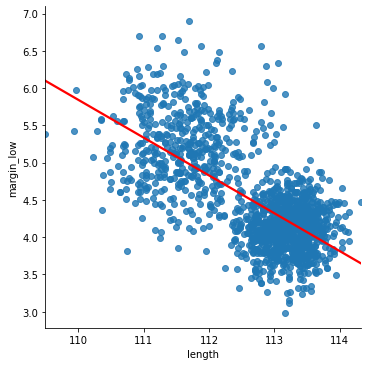

In [13]:
# visualisation de la regression
ax = sns.lmplot(x="length", y="margin_low", data=df_sans_nan, ci=None, line_kws={'color':'red'})
ax.set(xlabel="length", ylabel="margin_low")
plt.show()

import scipy.stats
(oddsratio, pvalue) = scipy.stats.fisher_exact([[1, 99], [8, 92]])

En supprimant des variables non significatives nous avons abaisse le r2 à 0,477 pour garder la variable la plus significative

C:\Users\seb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

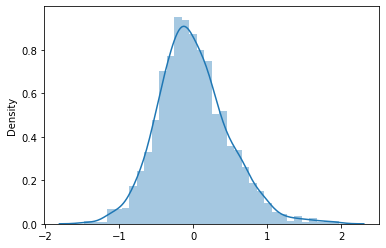

In [14]:
# residu et densité
sns.distplot(reg.resid)


la distribution des résidus est dite normale

In [15]:
# test de Kolomogorov smirnov
stats.kstest(reg.resid, 'norm')

KstestResult(statistic=0.19392879173599797, pvalue=1.1306368902417583e-48)

In [16]:
# coefficients de colinéarité
variables = reg.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]


[1.0136128990686333,
 1.138260573608249,
 1.230114515556036,
 1.4044037781843624,
 1.576950145366581]

In [17]:
# test de Breusch Pagan
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.7595352162174e-16


la p valeur est inférieure à 5% on rejette donc l'hypothèse selon laquelle les variances sont constantes(hypothèse d'homoscéasdticité)

In [18]:
# test de shapiro

Shapiro=shapiro(reg.resid)
Shapiro

ShapiroResult(statistic=0.9857879281044006, pvalue=8.536943374437556e-11)

Normalement distribué

### Imputation des valeurs manquantes

In [19]:
# regression linéaire
pred = reg.predict(df_nan[["diagonal","height_left","height_right","margin_up","length"]])
pred

72      4.318525
99      4.393668
151     4.410457
197     4.319014
241     4.650617
251     3.803308
284     4.179736
334     4.127442
410     4.135034
413     4.160539
445     4.177420
481     3.768554
505     4.058764
611     4.298047
654     4.160607
675     4.094065
710     4.439846
739     4.470650
742     4.341643
780     4.080414
798     3.614306
844     4.371811
845     4.093621
871     4.249629
895     3.893748
919     3.746333
945     4.237415
946     4.710533
981     4.137780
1076    5.050277
1121    4.802145
1176    5.067584
1303    5.047570
1315    4.778967
1347    5.726993
1435    5.185862
1438    5.140043
dtype: float64

In [20]:
df_nan["margin_low"] = pred
df_nan

<ipython-input-20-78931fade8ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["margin_low"] = pred


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.318525,3.25,112.79
99,True,171.93,104.07,104.18,4.393668,3.14,113.08
151,True,172.07,103.80,104.38,4.410457,3.02,112.93
197,True,171.45,103.66,103.80,4.319014,3.62,113.27
241,True,171.83,104.14,104.06,4.650617,3.02,112.36
251,True,171.80,103.26,102.82,3.803308,2.95,113.22
284,True,171.92,103.83,103.76,4.179736,3.23,113.29
334,True,171.85,103.70,103.96,4.127442,3.00,113.36
410,True,172.56,103.72,103.51,4.135034,3.12,112.95
413,True,172.30,103.66,103.50,4.160539,3.16,112.95


Les valeurs manquantes ont bien été remplacé

In [21]:
# regroupement des deux df et info sans valeurs nulles
billet = pd.concat([df_sans_nan,df_nan])
print(billet.shape)
billet.head()

(1500, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [22]:
# remplacement de true et false par 0 et 1
billet01=billet
billet01["is_genuine"]=billet["is_genuine"].apply(lambda x: 1 if x == True else 0)
billet01["is_genuine"] =billet01["is_genuine"].astype('category')
billet01

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.520000,2.89,112.83
1,1,171.46,103.36,103.66,3.770000,2.99,113.09
2,1,172.69,104.48,103.50,4.400000,2.94,113.16
3,1,171.36,103.91,103.94,3.620000,3.01,113.51
4,1,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...,...
1303,0,172.17,104.49,103.76,5.047570,2.93,111.21
1315,0,172.08,104.15,104.17,4.778967,3.40,112.29
1347,0,171.72,104.46,104.12,5.726993,3.61,110.31
1435,0,172.66,104.33,104.41,5.185862,3.56,111.47


## Description des données

In [23]:
# description du dataframe
billet.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.483475,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659632,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


On peut voir les moyennes de chaques variable ou encore le minimum et maximum

In [24]:
# description des vrais billets
billet_t=billet[billet["is_genuine"]==1]
billet_t.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.118174,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.317575,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.910000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.120000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


Observation des données pour les vrais billets

In [25]:
# description des faux billets
billet_f=billet[billet["is_genuine"]==0]
billet_f.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.214079,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.550363,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.180000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.590000,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


Observation des données pour les faux billets

### Visualisation de chaque variable entre les vrais et les faux billets

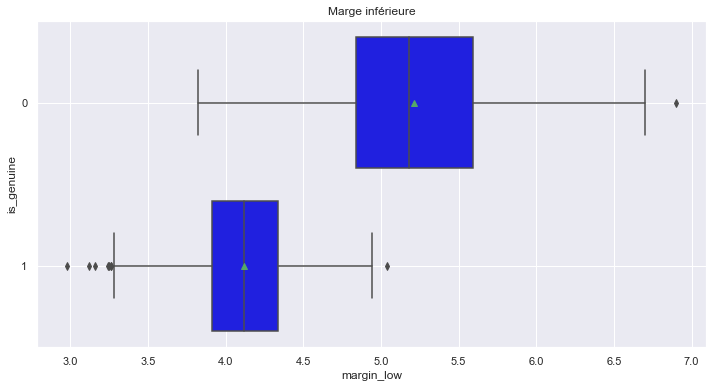

In [26]:
# visualisation de la colonne margin_low
sns.set()
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="margin_low", y="is_genuine", data=billet, showmeans=True, color="blue")
plt.xlabel("margin_low")
plt.ylabel("is_genuine")
plt.title("Marge inférieure")
plt.grid(True)
plt.show()

La marge du bord inférieur est plus petite sur les vrais billets, la moyenne des faux billets est supérieur au vrai billet le plus élevé

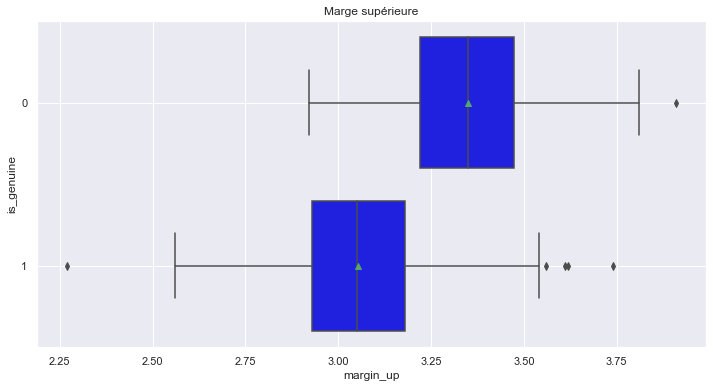

In [27]:
# visualisation de la colonne margin_up
sns.set()
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="margin_up", y="is_genuine", data=billet, showmeans=True,color="blue")
plt.xlabel("margin_up")
plt.ylabel("is_genuine")
plt.title("Marge supérieure")
plt.grid(True)
plt.show()

La marge supérieure des vrais billets est dans l'ensemble plus basse mais avec un grand écart avec la présence de plusieurs outliers

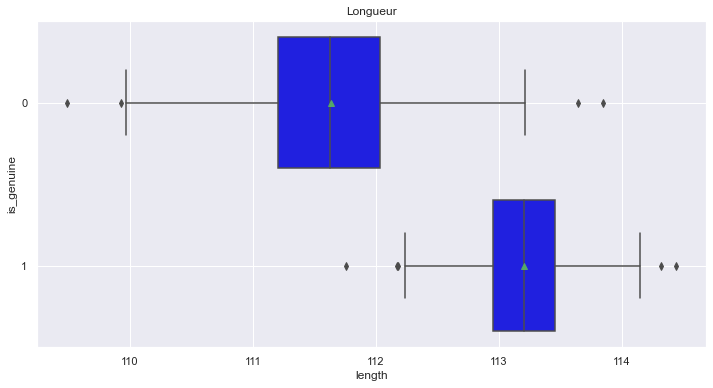

In [28]:
# visualisation de la colonne length
sns.set()
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="length", y="is_genuine", data=billet,showmeans=True, color="blue")
plt.xlabel("length")
plt.ylabel("is_genuine")
plt.title("Longueur")
plt.grid(True)
plt.show()

La longueur des des vrais billets est plus grande avec un faible écart, la moyenne des faux billets est inférieur à la valeur la plus faible des vrais billets

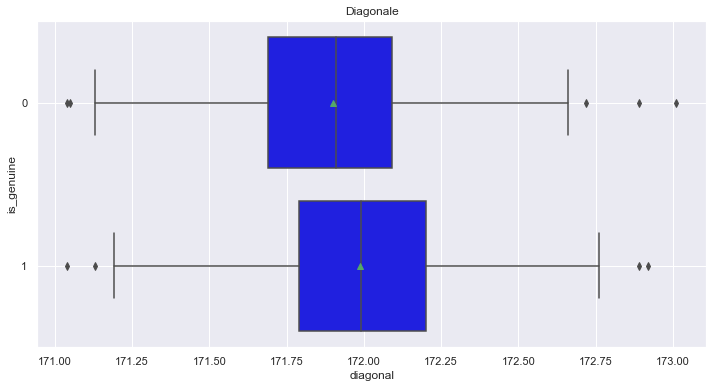

In [29]:
# visualisation de la colonne diagonal
sns.set()
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="diagonal", y="is_genuine", data=billet, showmeans=True,color="blue")
plt.xlabel("diagonal")
plt.ylabel("is_genuine")
plt.title("Diagonale")
plt.grid(True)
plt.show()

La diagonale des vrais et faux billets sont assez proches, leur moyenne est presque égale

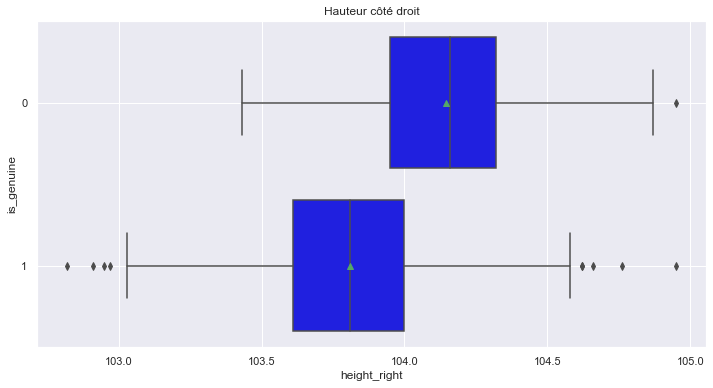

In [30]:
# visualisation de la colonne height_right
sns.set()
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="height_right", y="is_genuine", data=billet, showmeans=True, color="blue")
plt.xlabel("height_right")
plt.ylabel("is_genuine")
plt.title("Hauteur côté droit")
plt.grid(True)
plt.show()

La hauteur du côté droit est dans l'ensemble plus petite avec un écart assez grand et présence de plusieurs outliers dans les vrais billets

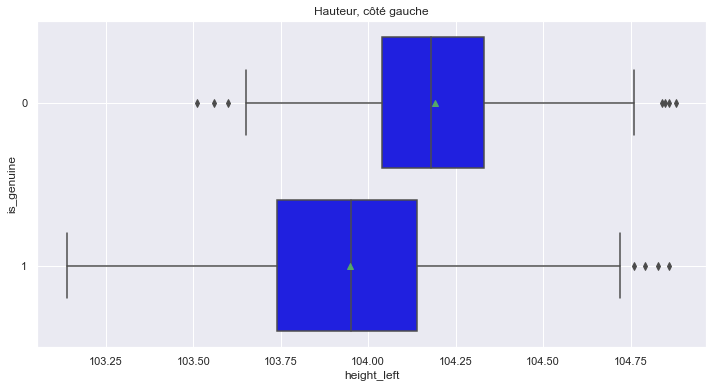

In [31]:
# visualisation de la colonne height_left
sns.set()
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="height_left", y="is_genuine", data=billet,showmeans=True, color="blue")
plt.xlabel("height_left")
plt.ylabel("is_genuine")
plt.title("Hauteur, côté gauche")
plt.grid(True)
plt.show()

La hauteur, côté gauche des vrais billets est dans l'ensemble plus petite, avec un écart assez élevé, présence de plusieurs outliers dans les vrais comme dans les faux billets

In [32]:
# visualisation des vrais billets
vrai_billet=billet[billet["is_genuine"]==1]
vrai_billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.520000,2.89,112.83
1,1,171.46,103.36,103.66,3.770000,2.99,113.09
2,1,172.69,104.48,103.50,4.400000,2.94,113.16
3,1,171.36,103.91,103.94,3.620000,3.01,113.51
4,1,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...,...
895,1,171.81,103.68,103.80,3.893748,2.98,113.82
919,1,171.92,103.68,103.45,3.746333,2.58,113.68
945,1,172.09,103.74,103.52,4.237415,3.02,112.78
946,1,171.63,103.87,104.66,4.710533,3.27,112.68


Ici sont présents les 1000 vrais billets

In [33]:
# visualisation des faux billets
faux_billet=billet[billet["is_genuine"]==0]
faux_billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1000,0,172.28,103.95,103.91,4.780000,3.31,111.40
1001,0,171.92,103.86,104.30,4.960000,3.13,111.29
1002,0,171.59,104.14,104.38,4.970000,3.47,111.22
1003,0,172.02,104.33,104.33,5.190000,3.21,111.99
1004,0,172.55,104.25,104.23,5.600000,3.13,111.72
...,...,...,...,...,...,...,...
1303,0,172.17,104.49,103.76,5.047570,2.93,111.21
1315,0,172.08,104.15,104.17,4.778967,3.40,112.29
1347,0,171.72,104.46,104.12,5.726993,3.61,110.31
1435,0,172.66,104.33,104.41,5.185862,3.56,111.47


Ici sont présents les 500 faux billets

In [34]:
taux_positif=round(len(vrai_billet)/1500*100,2)
print(f"{taux_positif} %")

66.67 %


In [35]:
taux_negatif=round(len(faux_billet)/1500*100,2)
print(f"{taux_negatif} %")

33.33 %


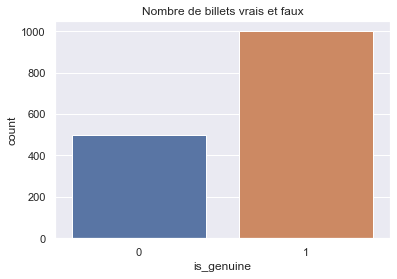

In [36]:
# visualisation des billets
plt.figure(figsize=(6,4))
sns.countplot(data=billet, x='is_genuine')
plt.title('Nombre de billets vrais et faux')
plt.show()

On voit bien le déséquilibre du jeu de donnée qui est donc imbalanced mais on peut dire que cela correspond à la vraie vie où il y a plus de vrais billets que de faux

## Standardisation des données

In [37]:
# normalisation des données
bil_sans_genu=billet.drop(columns=["is_genuine"])
Xn=bil_sans_genu.values
std_scale=preprocessing.StandardScaler().fit(Xn)
X_scaled=std_scale.transform(Xn)
X_scaled

array([[-0.48653957,  2.77412327,  3.16324041,  0.0553898 , -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08198744, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.12659056, -0.91256208,
         0.55190114],
       ...,
       [-0.78153123,  1.43794766,  0.61346228,  1.88579829,  1.97866106,
        -2.71480344],
       [ 2.29949275,  1.00369058,  1.50434862,  1.06517171,  1.76289814,
        -1.38519737],
       [-0.19154792,  0.83666863,  1.135706  ,  0.99568639,  0.38201544,
        -1.36227312]])

Standardisation des données afin de pouvroi les analyser sur une même échelle

## ACP

In [38]:
# création d'un acp

#PCA_decomposition = decomposition.PCA(svd_solver="full")
PCA_decomposition = decomposition.PCA(n_components=2)
PCA_decomposition.fit(X_scaled)
PCA_decomposition

PCA(n_components=2)

In [39]:
# Nombre de composantes
n_components = 2 
pca = PCA(n_components=n_components).fit(X_scaled)
print(
    "Variance expliquée :", 
    round(sum(pca.explained_variance_ratio_) * 100, 1), '%',
    "\nVariance par composante :", pca.explained_variance_ratio_)

Variance expliquée : 60.2 % 
Variance par composante : [0.43288253 0.16956616]


In [40]:
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(X_scaled)

#for i in range(0, n_components): 
 #   billet['PC' + str(i + 1)] = reduced[:, i]
#billet

In [41]:
# affichage des valeurs des deux composantes
X_projected=PCA_decomposition.transform(X_scaled)
data_proj=pd.DataFrame(X_projected)
data_proj.columns=["PC1","PC2"]
data_proj["is_genuine"]=billet["is_genuine"]
data_proj

,PC1,PC2,is_genuine
0,1.644135,0.747843,1
1,-2.019910,-2.207492,1
2,-0.969864,2.620492,1
3,-1.377462,-1.818370,1
4,0.148712,-0.566722,1
...,...,...,...
1495,1.157517,0.933306,0
1496,1.334642,0.522467,0
1497,4.040762,-0.505438,0
1498,2.774632,2.482888,0


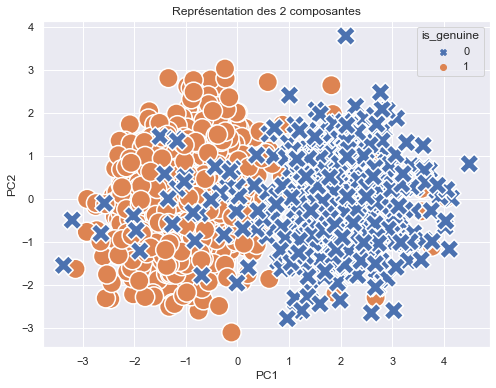

In [42]:
# visualisation des billets
plt.figure(figsize=(8, 6))
scatter_markers = ["X","o"]
sns.scatterplot(data=data_proj, x="PC1", y="PC2", style="is_genuine", hue="is_genuine", markers=scatter_markers, s=375)
plt.title("Représentation des 2 composantes")
plt.show()

La visualisation des billets projetés sur 2 composantes montre clairement 2 clusters 

In [43]:
# suppression de is_genuine
billet_c=billet.drop(["is_genuine"],axis=1)
billet_c

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.520000,2.89,112.83
1,171.46,103.36,103.66,3.770000,2.99,113.09
2,172.69,104.48,103.50,4.400000,2.94,113.16
3,171.36,103.91,103.94,3.620000,3.01,113.51
4,171.73,104.28,103.46,4.040000,3.48,112.54
...,...,...,...,...,...,...
1303,172.17,104.49,103.76,5.047570,2.93,111.21
1315,172.08,104.15,104.17,4.778967,3.40,112.29
1347,171.72,104.46,104.12,5.726993,3.61,110.31
1435,172.66,104.33,104.41,5.185862,3.56,111.47


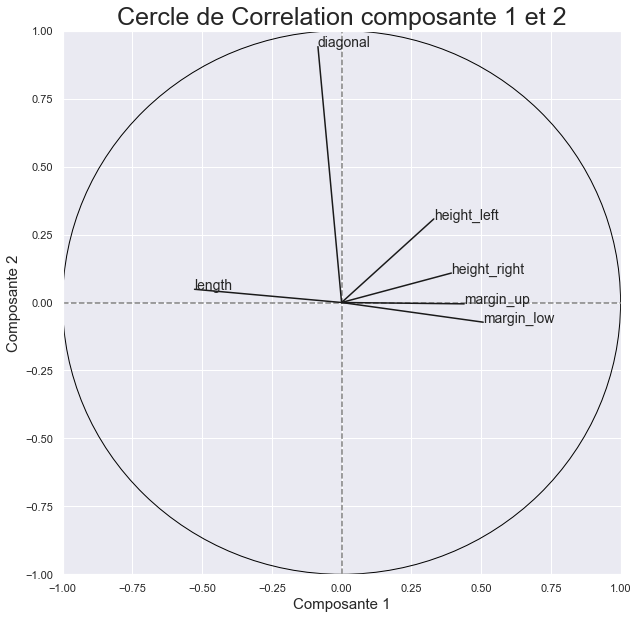

In [44]:
# Visualisation du cercle de corrélation  
Pca_test = PCA_decomposition.components_

fig,ax = plt.subplots(figsize=(10,10))
plt.plot([-1, 1], [0, 0], color = "grey", ls="--")
plt.plot([0, 0], [-1, 1], color = "grey", ls="--")

cercle = plt.Circle((0,0),1, color="black", fill=False)
ax.add_artist(cercle)

plt.xlim([-1, 1])
plt.ylim([-1, 1])

for n, (x, y) in enumerate(zip(Pca_test[0, :],Pca_test[1, :])) :
    
    plt.plot([0, x], [0, y], color="k")
    plt.text(x, y, billet_c.columns[n], fontsize="14")

    
plt.xlabel("Composante 1", fontsize = 15)
plt.ylabel("Composante 2", fontsize = 15)
plt.title(" Cercle de Correlation composante 1 et 2 ", fontsize = 25)
plt.grid(True)
plt.show()

Les hauteurs et les marges sont corrélées à la composante 1, la longueur est corrélé négativement à la composante 1, enfin
la diagonale est corrélée à la composante 2

## Kmeans

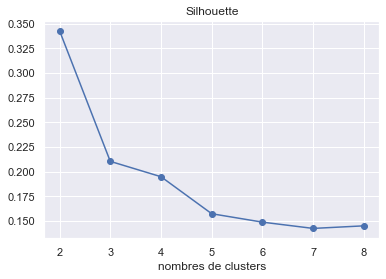

In [45]:
# mise en place d'un clustering
silhouettes=[]
#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
for k in range(2,9):
    cs = cluster.KMeans(n_clusters=k)
    cs.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, cs.labels_)
    silhouettes.append(silh)
#print(res)

plt.title("Silhouette")
plt.xlabel("nombres de clusters")
plt.plot(range(2,9),silhouettes,marker="o")
plt.show()

#### Nous allons pouvoir faire un kmean en 2 cluster et en 3 clusters

In [46]:
#billet1=billet.drop(columns=["PC1","PC2"],axis=1)
#billet1=billet.set_index("is_genuine")
#billet1

### K=2

In [47]:
# kmean
x1 = X_scaled  
kmeans = KMeans(n_clusters = 2,init = 'k-means++')
y_kmeans = kmeans.fit_predict(Xn)
y_kmeans = pd.DataFrame(y_kmeans, columns = ['Cluster'])

In [48]:
# affichage des centroides
Centroides_s = kmeans.cluster_centers_
Centroides_s = pd.DataFrame(Centroides_s,columns= billet_c.columns)
#Centroides_s.reset_index(inplace=True)
Centroides_s

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.986998,103.951654,103.813337,4.124147,3.058219,113.196152
1,171.898492,104.193017,104.144855,5.237769,3.347231,111.591860


In [49]:
# clusters
model = KMeans(n_clusters=2).fit(X_scaled)
modele = model.predict(X_scaled)
modele = pd.DataFrame(modele, index=billet.index, columns=['cluster'])
modele

,cluster
0,1
1,0
2,0
3,0
4,0
...,...
1303,1
1315,1
1347,1
1435,1


In [50]:
# df avec les clusters et les composantes
centroide_c=pd.concat([data_proj, modele["cluster"]], axis = 1)
centroide_c

,PC1,PC2,is_genuine,cluster
0,1.644135,0.747843,1,1
1,-2.019910,-2.207492,1,0
2,-0.969864,2.620492,1,0
3,-1.377462,-1.818370,1,0
4,0.148712,-0.566722,1,0
...,...,...,...,...
1495,1.157517,0.933306,0,1
1496,1.334642,0.522467,0,1
1497,4.040762,-0.505438,0,1
1498,2.774632,2.482888,0,1


In [51]:
# affichage des centroides de clusters
centroide_kmean=centroide_c.groupby("cluster")[["PC1","PC2"]].mean().reset_index()
centroide_kmean

,cluster,PC1,PC2
0,0,-0.896971,0.038591
1,1,1.815642,-0.078115


C:\Users\seb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


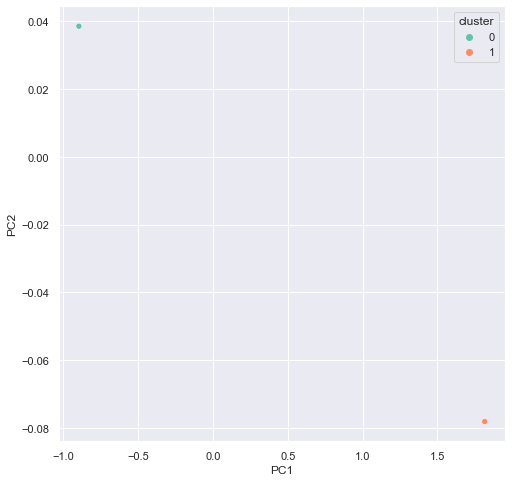

In [52]:
# visualisation des centroides
plt.figure(figsize=[8,8])
sns.scatterplot("PC1","PC2", data=centroide_kmean, hue=centroide_kmean["cluster"], palette="Set2")
plt.show()

In [53]:

contingency_matrix(centroide_c["is_genuine"],centroide_c["cluster"])

array([[ 14, 486],
       [990,  10]], dtype=int64)

In [54]:
# rajout de la colonne diagonale
centroide_c["diagonal"]=billet["diagonal"]

In [55]:
# table de contingence
table_cont=pd.pivot_table(centroide_c, values="diagonal", index=["cluster"], columns="is_genuine", aggfunc="count")
table_cont

is_genuine,0,1
cluster,,
0,14,990
1,486,10


On voit clairement que les deux clusters représentent les billets vrais et faux avec peu d'erreur

In [56]:
# cluster 1
cluster1=modele[modele["cluster"]==1]
cluster1

,cluster
0,1
253,1
341,1
580,1
626,1
...,...
1303,1
1315,1
1347,1
1435,1


In [57]:
# cluster 0
cluster0=modele[modele["cluster"]==0]
cluster0

,cluster
1,0
2,0
3,0
4,0
5,0
...,...
871,0
895,0
919,0
945,0


In [58]:
# inversion des clusters
billet1=centroide_c
billet1["is_genuine"]=billet1['is_genuine'].apply(lambda x: 0 if x == True else 1)
billet1

,PC1,PC2,is_genuine,cluster,diagonal
0,1.644135,0.747843,0,1,171.81
1,-2.019910,-2.207492,0,0,171.46
2,-0.969864,2.620492,0,0,172.69
3,-1.377462,-1.818370,0,0,171.36
4,0.148712,-0.566722,0,0,171.73
...,...,...,...,...,...
1495,1.157517,0.933306,1,1,171.75
1496,1.334642,0.522467,1,1,172.19
1497,4.040762,-0.505438,1,1,171.80
1498,2.774632,2.482888,1,1,172.06


In [59]:
#(centroide_c["cluster"]==centroide_c["is_genuine"]).sum()

In [60]:
# vérification des différences
cluster_dif=billet1[billet1["cluster"]!=billet1["is_genuine"]]
print(cluster_dif.shape)
cluster_dif

(24, 5)


,PC1,PC2,is_genuine,cluster,diagonal
0,1.644135,0.747843,0,1,171.81
253,-1.726379,0.791811,0,1,172.07
341,-1.347917,0.410745,0,1,171.90
580,-0.308435,1.732359,0,1,171.76
626,-0.222004,0.126416,0,1,171.98
669,-0.043934,1.295649,0,1,172.14
724,0.876345,1.728950,0,1,172.16
728,-0.249132,0.222232,0,1,171.94
743,-1.197881,0.061937,0,1,172.30
946,-1.863016,0.312194,0,1,171.63


### K=3

In [61]:
# kmean
x1b = X_scaled  
kmeans3 = KMeans(n_clusters = 3,init = 'k-means++')
y_kmeans3 = kmeans3.fit_predict(Xn)

In [62]:
# affichage des centroides
Centroides_s1 = kmeans3.cluster_centers_
Centroides_s1 = pd.DataFrame(Centroides_s1,columns= billet_c.columns)
Centroides_s1.reset_index(inplace=True)
Centroides_s1

,index,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,171.986117,103.951848,103.811729,4.124756,3.056937,113.200761
1,1,171.923796,104.182774,104.162482,4.845084,3.372007,111.517518
2,2,171.871916,104.200701,104.123692,5.716855,3.316168,111.695234


In [63]:
# clusters
model1 = KMeans(n_clusters=3).fit(X_scaled)
modele1 = model1.predict(X_scaled)
modele1 = pd.DataFrame(modele1, index=billet_c.index, columns=['cluster'])
modele1

,cluster
0,2
1,0
2,1
3,0
4,1
...,...
1303,2
1315,2
1347,2
1435,2


In [64]:
# affichage des clsuters et composantes
centroide_c1=pd.concat([data_proj, modele1["cluster"]], axis = 1)
centroide_c1

,PC1,PC2,is_genuine,cluster
0,1.644135,0.747843,1,2
1,-2.019910,-2.207492,1,0
2,-0.969864,2.620492,1,1
3,-1.377462,-1.818370,1,0
4,0.148712,-0.566722,1,1
...,...,...,...,...
1495,1.157517,0.933306,0,2
1496,1.334642,0.522467,0,2
1497,4.040762,-0.505438,0,2
1498,2.774632,2.482888,0,2


In [65]:
# affichage des centroides de clusters
centroide_kmean1=centroide_c1.groupby("cluster")[["PC1","PC2"]].mean().reset_index()
centroide_kmean1

,cluster,PC1,PC2
0,0,-0.930866,0.009246
1,1,-0.858709,0.076627
2,2,1.849442,-0.089252


C:\Users\seb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


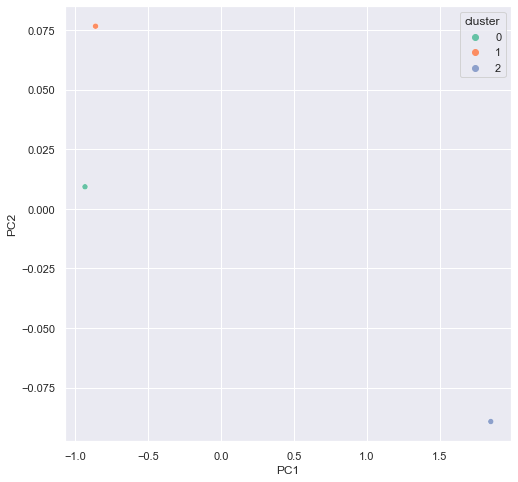

In [66]:
# visualisation des centroides
plt.figure(figsize=[8,8])
sns.scatterplot("PC1","PC2", data=centroide_kmean1, hue=centroide_kmean1["cluster"], palette="Set2")
plt.show()

In [67]:
contingency_matrix(centroide_c1["is_genuine"],centroide_c1["cluster"])

array([[  4,  11, 485],
       [498, 498,   4]], dtype=int64)

In [68]:
# rajout de la colonne
centroide_c1["diagonal"]=billet["diagonal"]

In [69]:
# table de contingence
table_cont1=pd.pivot_table(centroide_c1, values="diagonal", index=["cluster"], columns="is_genuine", aggfunc="count")
table_cont1

is_genuine,0,1
cluster,,
0,4,498
1,11,498
2,485,4


On voit que séparer en 3 clusters n'est pas intéressant car deux clusters sont presques identiques

## Modélisation

### Split 

In [70]:
# séparation des données en 2 sets
train_set = billet01.sample(frac=0.80, random_state=0)
test_set = billet01.drop(train_set.index).reset_index()
test_set_labels = test_set.pop('is_genuine')

On crée un train set avec 80% des données soit 1200 billets

In [71]:
test_set.drop('index',axis=1,inplace=True)
test_set.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.84,104.59,104.00,3.88,3.27,113.08
1,172.56,103.85,103.62,3.32,3.13,113.37
2,172.22,103.75,103.89,4.18,3.19,113.34
3,172.09,103.63,103.33,4.32,2.88,113.46
4,172.02,104.18,104.16,3.97,3.23,113.64


le test set lui comporte 20% des données soit 300 billets

In [72]:
# regression logistique
reg_log = smf.glm("is_genuine~diagonal+length+margin_up+height_right+height_left+margin_low",
                   data=train_set, family=sm.families.Binomial()).fit()
print(reg_log.summary())


                         Generalized Linear Model Regression Results                          
Dep. Variable:     ['is_genuine[0]', 'is_genuine[1]']   No. Observations:                 1200
Model:                                            GLM   Df Residuals:                     1193
Model Family:                                Binomial   Df Model:                            6
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -38.873
Date:                                Fri, 27 May 2022   Deviance:                       77.746
Time:                                        10:07:04   Pearson chi2:                 1.59e+03
No. Iterations:                                    10                                         
Covariance Type:                            nonrobust                                         
                   coef    std err          z     

La p_value est <0.05 donc le modèle est significatif dans sa globalité

In [73]:
test_set.reset_index(inplace=True)

In [74]:
# prédictions du test set
p_pred = reg_log.predict(test_set)

In [75]:
test_set['prob'] = 1-p_pred
test_set['pred'] = test_set['prob'].apply(lambda x: True if (x >= 0.5) else False)

test_set

,index,diagonal,height_left,height_right,margin_low,margin_up,length,prob,pred
0,0,171.84,104.59,104.00,3.880000,3.27,113.08,0.995466,True
1,1,172.56,103.85,103.62,3.320000,3.13,113.37,0.999998,True
2,2,172.22,103.75,103.89,4.180000,3.19,113.34,0.999565,True
3,3,172.09,103.63,103.33,4.320000,2.88,113.46,0.999995,True
4,4,172.02,104.18,104.16,3.970000,3.23,113.64,0.999849,True
...,...,...,...,...,...,...,...,...,...
295,295,171.93,104.07,104.18,4.393668,3.14,113.08,0.989048,True
296,296,172.01,103.97,104.05,4.058764,2.98,113.65,0.999990,True
297,297,171.60,103.85,103.91,4.094065,2.56,113.27,0.999999,True
298,298,171.37,104.07,103.75,4.249629,3.07,113.27,0.999718,True


In [76]:
# matrice de confusion
confusion_matrix = pd.crosstab(test_set_labels, test_set['pred'], rownames=['Actual'], colnames=['Predicted'])

print(confusion_matrix)

Predicted  False  True 
Actual                 
0             94      1
1              0    205


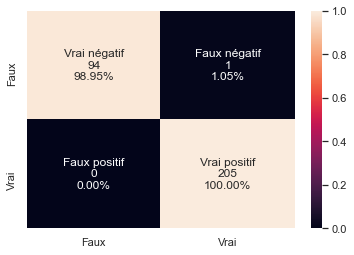

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       1.00      1.00      1.00       205

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



In [77]:
# visualisation de la matrice de confusion
def matrice_confusion(a,b):
    confusion_matrix = sk.metrics.confusion_matrix(a,b)
    group_names = ["Vrai négatif","Faux négatif","Faux positif","Vrai positif"]
    group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    pourcentage1=confusion_matrix[0]/np.sum(confusion_matrix[0])
    pourcentage2=confusion_matrix[1]/np.sum(confusion_matrix[1])
    confusion_matrix_p=np.array([pourcentage1,pourcentage2])
    group_percentages = [
        "{0:.2%}".format(value) for value in confusion_matrix_p.flatten()]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix_p, annot=labels,xticklabels=["Faux","Vrai"],yticklabels=["Faux","Vrai"], fmt='')
    plt.show()
    
    classification = sk.metrics.classification_report(a,b)
    print(classification)
matrice_confusion( test_set_labels, test_set["pred"])

Le modèle est très bon avec seulement 1 billet mal classé

In [78]:
# résultats
print("Accuracy:",metrics.accuracy_score(test_set_labels, test_set["pred"]))
print("Precision:",metrics.precision_score(test_set_labels, test_set["pred"]))
print("Recall:",metrics.recall_score(test_set_labels, test_set["pred"]))
print("F1_score:",metrics.f1_score(test_set_labels, test_set["pred"]))

Accuracy: 0.9966666666666667
Precision: 0.9951456310679612
Recall: 1.0
F1_score: 0.9975669099756691


In [84]:
# importation des données
test= pd.read_csv("billets_test.csv", sep=",")
# mise en index des id
test.set_index("id",inplace=True)
#prediction
pred1 = 1-reg_log.predict(test[["diagonal","length","margin_up","height_right","height_left","margin_low"]])
#probabilité et mise en place
test["proba"] = pred1
test["prediction"] = test["proba"].apply(lambda x: "Vrai billet" if (x >= 0.5) else "Faux billet")

test

,diagonal,height_left,height_right,margin_low,margin_up,length,proba,prediction
id,,,,,,,,
B_1,172.09,103.95,103.73,4.39,3.09,113.19,9.988985e-01,Vrai billet
B_2,171.52,104.17,104.03,5.27,3.16,111.82,7.948414e-04,Faux billet
B_3,171.78,103.80,103.75,3.81,3.24,113.39,9.999474e-01,Vrai billet
B_4,172.02,104.08,103.99,5.57,3.30,111.10,7.711285e-07,Faux billet
B_5,171.79,104.34,104.37,5.00,3.07,111.87,3.446527e-03,Faux billet


Notre modèle prédit 3 billets faux et 2 billets vrais selon leur probabilité à être proche de 0 ou proche de 1, plus la probabilité se rapproche de 1 alors le billet est condidéré comme vrai

In [80]:
test.reset_index(inplace=True)
test.to_csv("test_prediction.csv", index=False)
# enregistrer

# Fin